In [1]:
# multilogic filtering with rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors, rdMolDescriptors, GraphDescriptors
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors
import copy
import numpy as np
import pandas as pd
import pickle

from rdkit.Chem.MolStandardize import rdMolStandardize

from IPython.display import Image
from IPython.display import SVG

from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.ERROR)

,SMILES,CHEMBLID,"Inhibition, %",ID,Mol
0,CN1C(C(=O)Nc2ncc(C)s2)C(=O)c2ccc(C)cc2S1(=O)=O,CHEMBL366429,35,CHEMBL366429,
1,Clc1ccc(NC(=O)C2C(=O)N(C3CC3)S(=O)(=O)c3ccc(Cl...,CHEMBL176216,59,CHEMBL176216,
2,CN1C(C(=O)Nc2ccccc2)C(=O)c2c(ccc3ccccc23)S1(=O)=O,CHEMBL174680,16,CHEMBL174680,
3,CN1C(C(=O)Nc2ccccn2)C(=O)c2sc3cc(Cl)ccc3c2S1(=...,CHEMBL176357,6,CHEMBL176357,
4,CN1C(=O)C(C(=O)Nc2ccc(Cl)cc2Cl)c2c(Cl)c(Cl)ccc...,CHEMBL369840,28,CHEMBL369840,
...,...,...,...,...,...
134,CN1C(O)=C(C(=O)Nc2ccc(Cl)cc2)c2ccccc2C1=O,CHEMBL174990,76,CHEMBL174990,
135,CCN1C(=O)C(C(=O)Nc2ccc(Cl)cc2Cl)c2cc(Cl)ccc2S1...,CHEMBL353327,37,CHEMBL353327,
136,CN1C(C(=O)Nc2ccccn2)C(=O)c2c(c3ccccc3n2C)S1(=O)=O,CHEMBL177483,1,CHEMBL177483,
137,CN1C(=O)C(C(=O)Nc2ncc(C)s2)c2ccc(Cl)cc2S1(=O)=O,CHEMBL177273,2,CHEMBL177273,

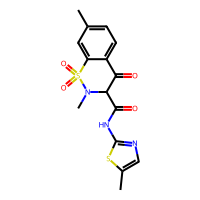
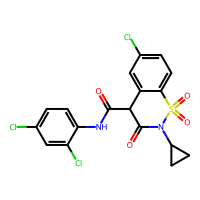
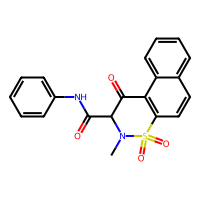
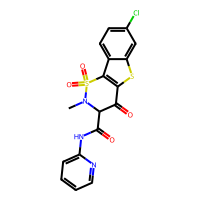
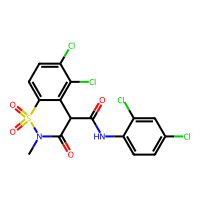
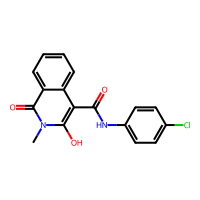
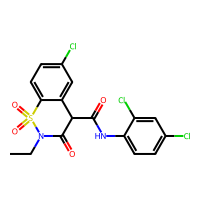
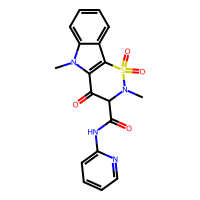
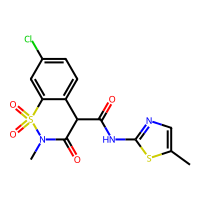
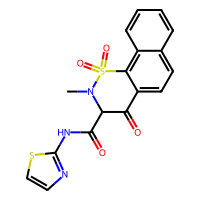

In [2]:
cox2_sdf = r'assets/COX2_inhibitors_final.sdf'
df = PandasTools.LoadSDF(cox2_sdf, molColName='Mol')
df


In [34]:
smarts1 = 'N1CC(=O)c2ccccc2S1(=O)=O' # we can also go smi > mol > smarts
pattern1 = Chem.MolFromSmarts(smarts1)

## label substructure - ver1
match_indicator = np.full((len(df.index),), 0 , dtype='int64')

for i in range(0 , len(df.index)):
    if df['Mol'][i].HasSubstructMatch(pattern1):
        match_indicator[i] = 1

## label substructure ver2
match_indicator2 = []
i = 0
for mol in df['Mol']:
    if mol.HasSubstructMatch(pattern1):
        match_indicator2.append(i)
    i += 1

print(match_indicator)
print(match_indicator2)

[1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0
 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1]
[0, 2, 5, 8, 9, 11, 15, 21, 24, 25, 27, 28, 37, 38, 40, 41, 42, 44, 45, 48, 52, 56, 61, 62, 63, 67, 68, 69, 71, 72, 73, 76, 81, 82, 86, 89, 99, 100, 101, 102, 103, 104, 107, 110, 113, 114, 117, 120, 130, 131, 133, 138]


,SMILES,CHEMBLID,"Inhibition, %",ID,Mol,Filter,Filter3
0,CN1C(C(=O)Nc2ncc(C)s2)C(=O)c2ccc(C)cc2S1(=O)=O,CHEMBL366429,35,CHEMBL366429,,1,1
1,Clc1ccc(NC(=O)C2C(=O)N(C3CC3)S(=O)(=O)c3ccc(Cl...,CHEMBL176216,59,CHEMBL176216,,0,0
2,CN1C(C(=O)Nc2ccccc2)C(=O)c2c(ccc3ccccc23)S1(=O)=O,CHEMBL174680,16,CHEMBL174680,,1,1
3,CN1C(C(=O)Nc2ccccn2)C(=O)c2sc3cc(Cl)ccc3c2S1(=...,CHEMBL176357,6,CHEMBL176357,,0,0
4,CN1C(=O)C(C(=O)Nc2ccc(Cl)cc2Cl)c2c(Cl)c(Cl)ccc...,CHEMBL369840,28,CHEMBL369840,,0,0
...,...,...,...,...,...,...,...
134,CN1C(O)=C(C(=O)Nc2ccc(Cl)cc2)c2ccccc2C1=O,CHEMBL174990,76,CHEMBL174990,,0,0
135,CCN1C(=O)C(C(=O)Nc2ccc(Cl)cc2Cl)c2cc(Cl)ccc2S1...,CHEMBL353327,37,CHEMBL353327,,0,0
136,CN1C(C(=O)Nc2ccccn2)C(=O)c2c(c3ccccc3n2C)S1(=O)=O,CHEMBL177483,1,CHEMBL177483,,0,0
137,CN1C(=O)C(C(=O)Nc2ncc(C)s2)c2ccc(Cl)cc2S1(=O)=O,CHEMBL177273,2,CHEMBL177273,,0,0

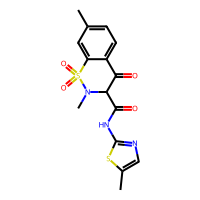
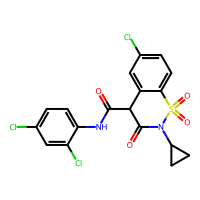
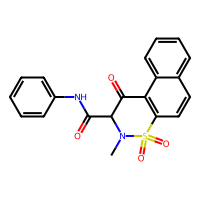
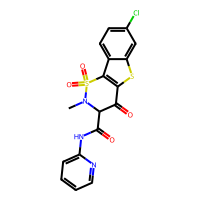
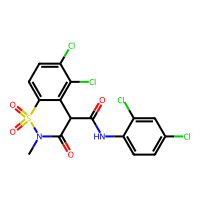
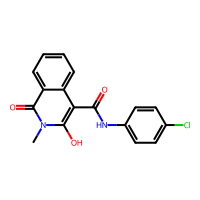
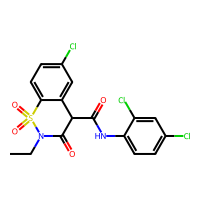
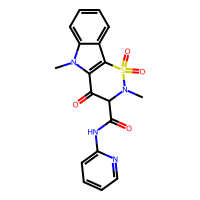
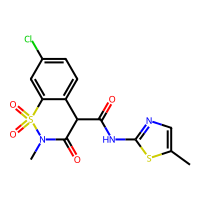
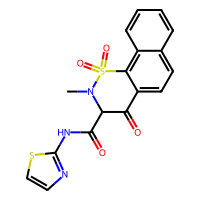

In [35]:
## add as a column
match_col1 = np.full(len(df.index), 0, dtype='int64')
match_col1[match_indicator2] = 1
df['Filter'] = match_col1
df

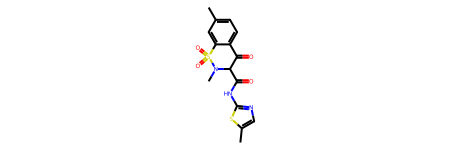

In [36]:
# filter
df.loc[(df['Filter']==1), 'Mol'][0]

In [17]:
# create new df for export

new_df = df.loc[(df['Filter']==1)]
# PandasTools.WriteSDF(new_df, "path",
#                      molColName='Mol',
#                      properties=list(new_df.columns)
#                      )

In [37]:
# multilogic filtering
chlorine_pattern = Chem.MolFromSmiles('[#17]')
match_indicator3 = []
i = 0
for mol in df['Mol']:
    if mol.HasSubstructMatch(chlorine_pattern) | mol.HasSubstructMatch(pattern1):
    # if mol.HasSubstructMatch(pattern1):
        match_indicator3.append(i)
    i += 1

match_col3 = np.full(len(df.index), 0, dtype='int64')
match_col3[match_indicator3] = 1
df['Filter3'] = match_col3
print(f"length of number of matches : {len(df.loc[(df['Filter3']==1)])}")
print(f"length of number of matches : {len(df.loc[(df['Filter']==1)])}")

length of number of matches : 52
length of number of matches : 52


In [38]:
print(sum(match_col1))
print(sum(match_col3))

52
52
